# Simulate Amazon stock prices
Using historical data from for 2014-10-01 to 2016-09-30, computed historical returns in a Google Sheet, 
and now we will do a Monte Carlo simulation using the standard deviation of returns

Populating the interactive namespace from numpy and matplotlib
VaR = 229699.548368
ES =281685.73108
177.059115259


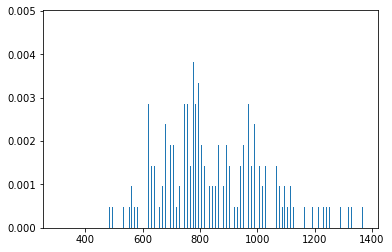

In [20]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

current_price = 837.31 
sigma_one_day = 0.2

#for Monte Carlo, we randomly generate log returns, apply to the current price to find simulated future prices.
num_trials = 1000
#generate random normal
mean_daily_return = 0
simulated_log_returns = np.random.normal(mean_daily_return, sigma_one_day,num_trials) #N(u,delta^2)distribution

simulated_prices = [current_price * np.exp(ret) for ret in simulated_log_returns] #Pt+1=Pt*e^Rt,t+1


# boot camp for 08/30/2017 added information
num_shares_AMZN = 1000  # to calculate the sum you get
profit_and_loss = [num_shares_AMZN * (price - current_price) for price in simulated_prices] # to calculate the difference
var_quantile = 0.05
VaR = - sorted(profit_and_loss)[int(var_quantile * num_trials)]
print('VaR = '+ str(VaR))
VaR_excessions = [loss for loss in profit_and_loss if loss < -VaR]
ES = - np.mean(VaR_excessions)
print('ES ='+ str(ES))  

num_bins = 500 
price_sigma = np.std(simulated_prices) #calculate the standard variance of simulated_prices
plt.hist(simulated_prices,bins = num_bins, normed = True,align = 'left',rwidth = 0.3,range = (current_price-3*price_sigma,current_price+3*price_sigma))
# range = (min(profit_and_loss), max(profit_and_loss))
# range = (current_price-3*price_sigma,current_price+3*price_sigma)
simulated_prices
print(np.std(simulated_prices)) 